Using TensorFlow backend.


170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 10)
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 62s 1ms/step - loss: 1.9090 - accuracy: 0.4532 - val_loss: 1.2229 - val_accuracy: 0.5802
Epoch 2/40
50000/50000 [==============================] - 31s 611us/step - loss: 1.0996 - accuracy: 0.6236 - val_loss: 1.0326 - val_accuracy: 0.6576
Epoch 3/40
50000/50000 [==============================] - 30s 609us/step - loss: 0.9457 - accuracy: 0.6844 - val_loss: 0.8511 - val_accuracy: 0.7184
Epoch 4/40
50000/50000 [==============================] - 30s 610us/step - loss: 0.8469 - accuracy: 0.7191 - val_loss: 0.8445 - val_accuracy: 0.7205
Epoch 5/40
50000/50000

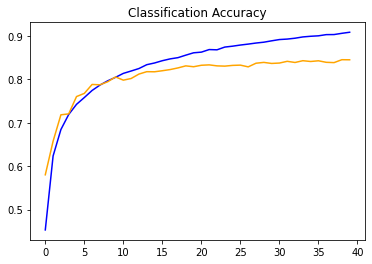

Accuracy: 84.51%


In [1]:
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation
from keras.layers import Flatten, BatchNormalization
from keras import regularizers
from keras.optimizers import SGD
from keras.utils import np_utils
(train_x, train_y), (val_x, val_y) = cifar10.load_data()
train_x = train_x.astype('float32')
val_x = val_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x / 255.0
train_y = np_utils.to_categorical(train_y)
val_y = np_utils.to_categorical(val_y)
num_classes = val_y.shape[1]
print(train_x.shape)
print(train_y.shape)
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
epochs = 40
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
history = model.fit(train_x, train_y, validation_data=(val_x, val_y), epochs=epochs, batch_size=64)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.show()
scores = model.evaluate(val_x, val_y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))